C:\Users\y-kobayashi\Anaconda3\envs\rein-env\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


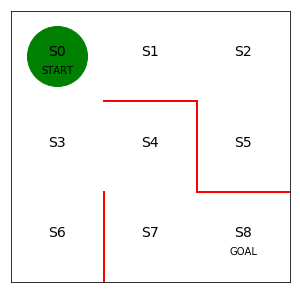

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1],[0,1],color='red', linewidth=2)
plt.plot([1,2],[2,2],color='red', linewidth=2)
plt.plot([2,2],[2,1],color='red', linewidth=2)
plt.plot([2,3],[1,1],color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker="o",color='g', markersize=60)



In [2]:
theta_0 = np.array([[np.nan, 1, 1, np.nan], #S0
                    [np.nan, 1, np.nan, 1], #S1
                    [np.nan, np.nan, 1, 1], #S2
                    [1, 1, 1, np.nan], #S3
                    [np.nan, np.nan, 1, 1], #S4
                    [1, np.nan, np.nan, np.nan], #S5
                    [1, np.nan, np.nan, np.nan], #S6
                    [1, 1, np.nan, np.nan], #S7
                   ])
theta_0

array([[nan,  1.,  1., nan],
       [nan,  1., nan,  1.],
       [nan, nan,  1.,  1.],
       [ 1.,  1.,  1., nan],
       [nan, nan,  1.,  1.],
       [ 1., nan, nan, nan],
       [ 1., nan, nan, nan],
       [ 1.,  1., nan, nan]])

In [3]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b)*theta_0*0.1
Q

array([[       nan, 0.04636119, 0.01398211,        nan],
       [       nan, 0.03146032,        nan, 0.05737093],
       [       nan,        nan, 0.05923528, 0.03306626],
       [0.04037086, 0.09567382, 0.05659399,        nan],
       [       nan,        nan, 0.0557685 , 0.02033273],
       [0.08627837,        nan,        nan,        nan],
       [0.06731514,        nan,        nan,        nan],
       [0.00269395, 0.01570185,        nan,        nan]])

In [35]:
def simple_convert_into_pi_from_theta(theta):
    
    [m,n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :]/np.nansum(theta[i, :])
    
    pi = np.nan_to_num(pi)
    
    return pi

# def soft_max_convert_Q_s(Q, s):
    
#     [m,n] = Q.shape
#     new_Q = np.zeros((m, n))
    
#     new_Q[s, :] = Q[s, :]/np.nansum(Q[s, :])
    
#     new_Q = np.nan_to_num(new_Q)*0.1
    
#     return new_Q


In [36]:
def get_action(s, Q, epsilon, pi_0):
    
    direction = ["up", "right", "down", "left"]
    
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]
    
    if next_direction == "up":
        action = 0
    if next_direction == "right":
        action = 1
    if next_direction == "down":
        action = 2
    if next_direction == "left":
        action = 3
    
    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    
    direction = ["up", "right", "down", "left"]
    next_action = direction[a]
    
    if next_action == "up":
        s_next = s - 3
    if next_action == "right":
        s_next = s + 1
    if next_action == "down":
        s_next = s + 3
    if next_action == "left":
        s_next = s - 1

    return s_next

In [37]:
def Q_learnings(s, a, r, s_next, Q, eta, gamma):
    
    if s_next == 8:
        Q[s,a] = Q[s,a] + eta*(r - Q[s,a])
    else:
        Q[s,a] = Q[s,a] + eta*(r + gamma*np.nanmax(Q[s_next,:]) - Q[s,a])
#         Q = soft_max_convert_Q_s(Q, s)
    
    
    return Q



In [38]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while(1):
        a = a_next
        s_a_history[-1][1] = a
        s_next = get_s_next(s, a, Q, epsilon, pi)
        s_a_history.append([s_next, np.nan])
        
        if s_next==8:
            r=1
            a_next = np.nan
        else:
            r=0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        Q = Q_learnings(s, a, r, s_next, Q ,eta, gamma)
        
        if s_next==8:
            break
        else:
            s = s_next
    
    return [s_a_history, Q]

#print(Q)
#q=Q
#for i in range(10):
#    q=goal_maze_ret_s_a_Q(Q, 0.1, 0.1, 0.9, pi_0)
#q

In [39]:
theta_0 = np.array([[np.nan, 1, 1, np.nan], #S0
                    [np.nan, 1, np.nan, 1], #S1
                    [np.nan, np.nan, 1, 1], #S2
                    [1, 1, 1, np.nan], #S3
                    [np.nan, np.nan, 1, 1], #S4
                    [1, np.nan, np.nan, np.nan], #S5
                    [1, np.nan, np.nan, np.nan], #S6
                    [1, 1, np.nan, np.nan], #S7
                   ])
pi_0 = simple_convert_into_pi_from_theta(theta_0)
[a, b] = theta_0.shape
Q = np.random.rand(a, b)*theta_0*0.1

eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

V =[]
V.append(np.nanmax(Q, axis=1))

while is_continue:
    
    print("エピソード：" + str(episode))
    epsilon = epsilon/2
    
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    print(Q)
    v = new_v
    V.append(v)
    
    print("step : {0}".format(len(s_a_history)-1))
    
    episode = episode +1
    if episode >100:
        break

V

エピソード：1
0.3643773064180322
[[       nan 0.02994237 0.02291504        nan]
 [       nan 0.02992643        nan 0.02969523]
 [       nan        nan 0.02995763 0.02980634]
 [0.01036698 0.01683819 0.05132055        nan]
 [       nan        nan 0.09671208 0.02662293]
 [0.02995877        nan        nan        nan]
 [0.05104952        nan        nan        nan]
 [0.06577975 0.16771014        nan        nan]]
step : 642
エピソード：2
0.1076784577015413
[[       nan 0.02525234 0.02524238        nan]
 [       nan 0.02523977        nan 0.02499645]
 [       nan        nan 0.0251723  0.02504092]
 [0.01036698 0.02385846 0.05132055        nan]
 [       nan        nan 0.10213478 0.02662293]
 [0.02509402        nan        nan        nan]
 [0.05104952        nan        nan        nan]
 [0.06577975 0.25093913        nan        nan]]
step : 106
エピソード：3
0.13090120985443912
[[       nan 0.02499869 0.028808          nan]
 [       nan 0.0249813         nan 0.02476862]
 [       nan        nan 0.02491353 0.02478651]
 

 [0.06577975 0.9900354         nan        nan]]
step : 4
エピソード：44
0.02651474609269633
[[       nan 0.02499869 0.49589628        nan]
 [       nan 0.0249813         nan 0.02476862]
 [       nan        nan 0.02491353 0.02478651]
 [0.01315908 0.6832519  0.03063724        nan]
 [       nan        nan 0.85278135 0.02662293]
 [0.0248383         nan        nan        nan]
 [0.03047887        nan        nan        nan]
 [0.06577975 0.99103186        nan        nan]]
step : 4
エピソード：45
0.025139720671070898
[[       nan 0.02499869 0.50779933        nan]
 [       nan 0.0249813         nan 0.02476862]
 [       nan        nan 0.02491353 0.02478651]
 [0.01315908 0.69167703 0.03063724        nan]
 [       nan        nan 0.85669608 0.02662293]
 [0.0248383         nan        nan        nan]
 [0.03047887        nan        nan        nan]
 [0.06577975 0.99192867        nan        nan]]
step : 4
エピソード：46
0.023817049660272316
[[       nan 0.02499869 0.51927033        nan]
 [       nan 0.0249813         nan 

[array([0.07373237, 0.09077843, 0.08470752, 0.08530717, 0.09993451,
        0.08019565, 0.07611235, 0.07523349]),
 array([0.02994237, 0.02992643, 0.02995763, 0.05132055, 0.09671208,
        0.02995877, 0.05104952, 0.16771014]),
 array([0.02525234, 0.02523977, 0.0251723 , 0.05132055, 0.10213478,
        0.02509402, 0.05104952, 0.25093913]),
 array([0.028808  , 0.0249813 , 0.02491353, 0.0316203 , 0.11450582,
        0.0248383 , 0.0314543 , 0.32584521]),
 array([0.02877303, 0.0249813 , 0.02491353, 0.03790379, 0.13238131,
        0.0248383 , 0.03047887, 0.39326069]),
 array([0.02930707, 0.0249813 , 0.02491353, 0.04602773, 0.15453664,
        0.0248383 , 0.03047887, 0.45393462]),
 array([0.03051886, 0.0249813 , 0.02491353, 0.05533325, 0.17993709,
        0.0248383 , 0.03047887, 0.50854116]),
 array([0.03244696, 0.0249813 , 0.02491353, 0.06599427, 0.20771209,
        0.0248383 , 0.03047887, 0.55768704]),
 array([0.03514175, 0.0249813 , 0.02491353, 0.07808893, 0.23713271,
        0.0248383 , 

In [40]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm

def init():
    
    line.set_data([], [])
    return (line,)


def animate(i):
    
    line, = ax.plot([0.5], [2.5], marker="s", color=cm.jet(V[i][0]), markersize=85)
    line, = ax.plot([1.5], [2.5], marker="s", color=cm.jet(V[i][1]), markersize=85)
    line, = ax.plot([2.5], [2.5], marker="s", color=cm.jet(V[i][2]), markersize=85)
    line, = ax.plot([0.5], [1.5], marker="s", color=cm.jet(V[i][3]), markersize=85)
    line, = ax.plot([1.5], [1.5], marker="s", color=cm.jet(V[i][4]), markersize=85)
    line, = ax.plot([2.5], [1.5], marker="s", color=cm.jet(V[i][5]), markersize=85)
    line, = ax.plot([0.5], [0.5], marker="s", color=cm.jet(V[i][6]), markersize=85)
    line, = ax.plot([1.5], [0.5], marker="s", color=cm.jet(V[i][7]), markersize=85)
    line, = ax.plot([2.5], [0.5], marker="s", color=cm.jet(1.0), markersize=85)

    return(line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())